# 实验三：参数估计&非参数估计

###  姓名：任薏霖
###  学号：2011897
###  专业：物联网工程

In [1]:
import numpy as np
import pandas as pd
import sys
import math
import operator
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 初级要求 （1）

#### 生成数据

In [2]:
# 生成正态分布数据
def Generate_Sample_Gaussian(mean, cov, P, label):
    '''
        mean 为均值向量
        cov 为方差矩阵a
        P 为单个类的先验概率
        return 单个类的数据集
    '''
    # round(x[,n=0]) 保留到几位小数
    temp_num = round(1200 * P)
    
    # 生成一个多元正态分布矩阵
    x, y = np.random.multivariate_normal(mean, cov, temp_num).T
    
    #x,y坐标，x和y矩阵均符合正态分布
    #z表示每个点属于哪一类
    z = np.ones(temp_num) * label
    X = np.array([x, y, z])
    
    #X.T中每个元素都是有三个元素的列表，分别表示x值，y值，以及对应的标签
    return X.T

In [3]:
def Generate_DataSet(mean, cov, P):
  # 按照先验概率生成正态分布数据
  # 返回所有类的数据集
    X = []
    label = 1
    for i in range(3):
        # 把此时类i对应的数据集加到已有的数据集中
        X.extend(Generate_Sample_Gaussian(mean[i], cov, P[i], label))
        label += 1
        i = i + 1

    return X

In [4]:
def Generate_DataSet_plot(mean, cov, P):
    # 画出不同先验对应的散点图
    xx = []
    label = 1
    
    # 将xx变为包含三类数据的数据集
    for i in range(3):
        xx.append(Generate_Sample_Gaussian(mean[i], cov, P[i], label))
        label += 1
        i = i + 1
    
    #在这时xx是一个有三个元素的列表，每个元素都是一个类
    # 画图
    
    fig = plt.figure(figsize = (10, 6))
    
    plt.rcParams['font.sans-serif'] = ['SimHei']
    if P==[1/3, 1/3, 1/3]:
        plt.title("X1分布图")
    else:
        plt.title("X2分布图")
    for i in range(3):
        #画出每类的样本向量(x,y)
        plt.plot(xx[i][:, 0], xx[i][:, 1], '.', markersize=4.)
        #画出每类的中心点(均值向量对应的点)
        plt.plot(mean[i][0], mean[i][1], 'r*')
    
    plt.show()
    return xx

In [5]:
mean = np.array([[1, 4], [4, 1], [8, 4]])  # 均值数组
cov = [[2, 0], [0, 2]]  # 方差矩阵
num = 1200  # 样本个数
P1 = [1 / 3, 1 / 3, 1 / 3]  # 样本X1的先验概率
P2 = [0.6, 0.1, 0.3]  # 样本X2的先验概率

In [6]:
X1 = np.array(Generate_DataSet(mean, cov, P1))
X2 = np.array(Generate_DataSet(mean, cov, P2))

print(X1)
print(X2)

[[2.10264455 3.98712517 1.        ]
 [1.48564816 7.23208243 1.        ]
 [0.72687607 5.69241204 1.        ]
 ...
 [5.76921628 4.57974403 3.        ]
 [6.79704659 3.72532634 3.        ]
 [8.16395456 3.26148636 3.        ]]
[[ 1.79833683  6.10580331  1.        ]
 [ 0.29114856  3.44365618  1.        ]
 [ 2.93393118  5.65592752  1.        ]
 ...
 [ 9.63336605  4.20421021  3.        ]
 [11.61955824  4.24894957  3.        ]
 [ 7.44385688  2.80260296  3.        ]]


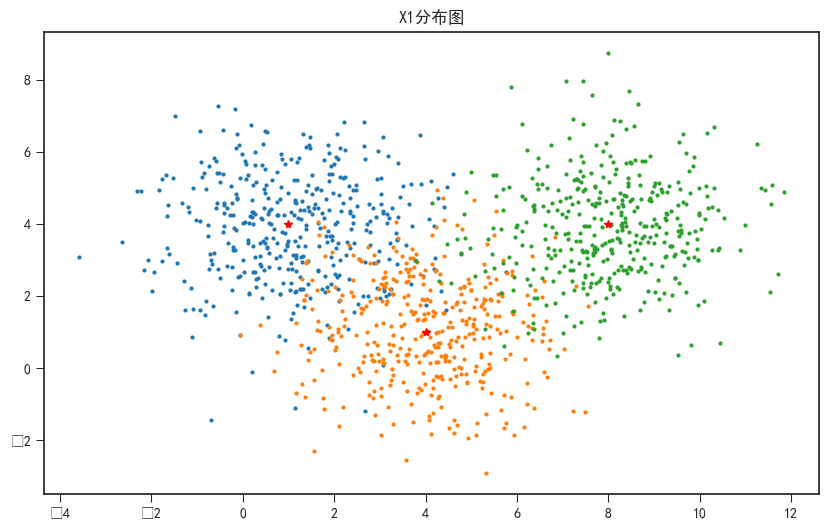

In [34]:
pic_X1 = np.array(Generate_DataSet_plot(mean, cov, P1), dtype=object)

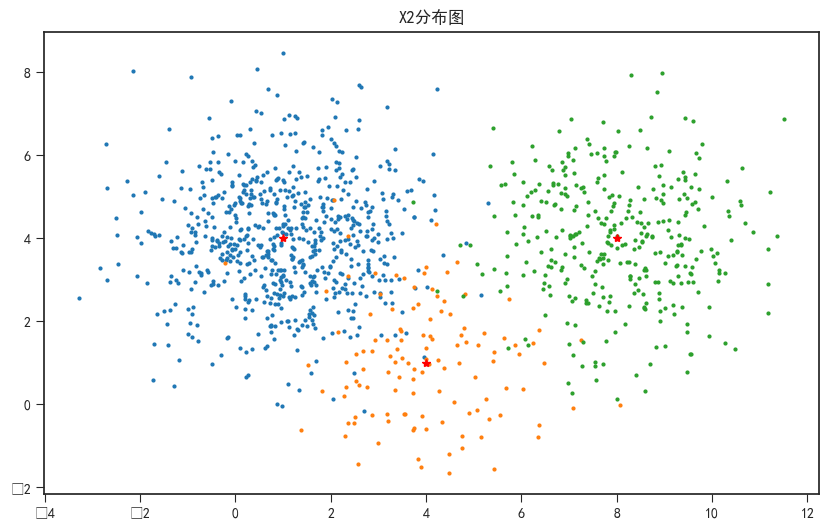

In [35]:
pic_X2 = np.array(Generate_DataSet_plot(mean, cov, P2), dtype=object)

#### 高斯 

In [8]:
def Gaussian_function(x, mean, cov):
    '''
    1.np.linalg.det() 求矩阵的行列式
    2.np.linalg.inv() 求矩阵的逆
    3.np.dot() 求两矩阵的乘积
    '''
    det_cov = np.linalg.det(cov)  # 计算方差矩阵的行列式
    inv_cov = np.linalg.inv(cov)  # 计算方差矩阵的逆
    #计算概率p(x|w)
    
    p = 1/(2 * np.pi * np.sqrt(det_cov)) * np.exp(-0.5 * 
        np.dot(np.dot((x - mean), inv_cov), (x - mean)))
    
    return p

#### 似然率测试函数

In [9]:
#似然率测试函数
def Likelihood_text(X, mean, cov, p):
    
    class_num = mean.shape[0] #类的个数
    
    num = np.array(X).shape[0]
    
    error_rate = 0
    
    for i in range(num):
        temp = np.zeros(3)
        for j in range(class_num):
            temp[j] = Gaussian_function(X[i][0:2], mean[j], cov)  # 计算样本i决策到j类的概率
        p_class = np.argmax(temp) + 1                             # 得到样本i决策到的类
        
        if p_class != X[i][2]:                                    # 决策结果和真实结果不同
            error_rate += 1
    
    return round(error_rate / num, 3)

#### 最大后验概率测试函数

In [10]:
##最大后验概率规则
def Max_text(X, mean, cov, p):
    
    class_num = mean.shape[0] #类的个数
    
    num = np.array(X).shape[0]
    
    error_rate = 0
    
    for i in range(num):
        temp = np.zeros(3)
        for j in range(class_num):
            temp[j] = Gaussian_function(X[i][0:2], mean[j], cov) * p[j] # 计算样本i决策到j类的概率
        
        p_class = np.argmax(temp) + 1 # 得到样本i决策到的类
        
        if p_class != X[i][2]:        #决策结果和真实结果不同
            error_rate += 1
    
    return round(error_rate / num, 3)

In [11]:
# 单次试验求不同准则下的分类误差
def repeated_trials(mean, cov, P1, P2):
    # 根据mean，cov，P1,P2生成数据集X1,X2
    # 通过不同规则得到不同分类错误率并返回
    # 生成N=1000的数据集

    X1 = Generate_DataSet(mean, cov, P1)
    X2 = Generate_DataSet(mean, cov, P2)

    error = np.zeros((2, 2))
    # 计算似然率测试规则误差
    error_likelihood = Likelihood_text(X1, mean, cov, P1)
    error_likelihood_2 = Likelihood_text(X2, mean, cov, P2)
    error[0] = [error_likelihood, error_likelihood_2]
    # 计算最大后验概率规则误差
    error_Max_Posterior_Rule = Max_text(X1, mean, cov, P1)
    error_Max_Posterior_Rule_2 = Max_text(X2, mean, cov, P2)
    error[1] = [error_Max_Posterior_Rule, error_Max_Posterior_Rule_2]
    return error

In [12]:
error_all = np.zeros((2, 2))
# 测试times_num次求平均
times_num = 10
for times in range(times_num):
    error = repeated_trials(mean,cov,P1,P2)
    print("第{}次试验: 极似然规则 最大后验规则".format(times + 1))
    print("X1误差:   \t{}  \t{}".format(error[0][0], error[1][0]))
    print("X2误差:   \t{}  \t{}".format(error[0][1], error[1][1]))
    error_all += error

第1次试验: 极似然规则 最大后验规则
X1误差:   	0.069  	0.069
X2误差:   	0.063  	0.043
第2次试验: 极似然规则 最大后验规则
X1误差:   	0.079  	0.079
X2误差:   	0.062  	0.046
第3次试验: 极似然规则 最大后验规则
X1误差:   	0.072  	0.072
X2误差:   	0.054  	0.044
第4次试验: 极似然规则 最大后验规则
X1误差:   	0.058  	0.058
X2误差:   	0.062  	0.041
第5次试验: 极似然规则 最大后验规则
X1误差:   	0.071  	0.071
X2误差:   	0.067  	0.047
第6次试验: 极似然规则 最大后验规则
X1误差:   	0.069  	0.069
X2误差:   	0.068  	0.049
第7次试验: 极似然规则 最大后验规则
X1误差:   	0.072  	0.072
X2误差:   	0.058  	0.041
第8次试验: 极似然规则 最大后验规则
X1误差:   	0.072  	0.072
X2误差:   	0.059  	0.049
第9次试验: 极似然规则 最大后验规则
X1误差:   	0.065  	0.065
X2误差:   	0.076  	0.048
第10次试验: 极似然规则 最大后验规则
X1误差:   	0.068  	0.068
X2误差:   	0.071  	0.048


In [13]:
print("X1误差: 极似然规则{}  最大后验规则{}".format(Likelihood_text(X1, mean, cov, P1), 
                                  Max_text(X1, mean, cov, P1)))
print("X2误差: 极似然规则{}  最大后验规则{}".format(Likelihood_text(X2, mean, cov, P2), 
                                  Max_text(X2, mean, cov, P2)))

X1误差: 极似然规则0.069  最大后验规则0.069
X2误差: 极似然规则0.053  最大后验规则0.038


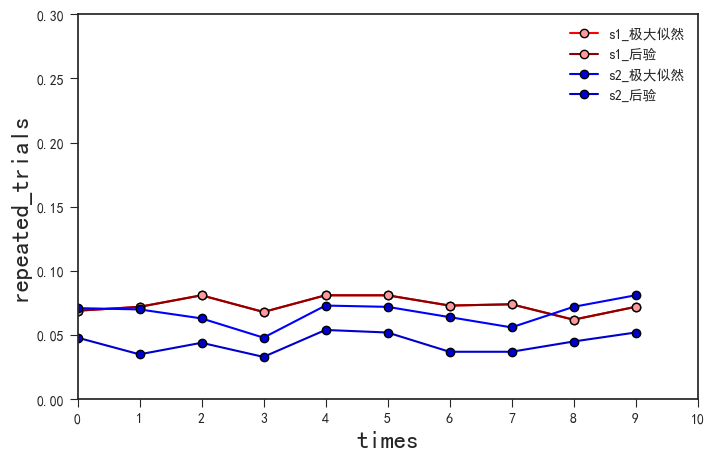

In [14]:
Likelyhood1 = []
error1 = []
Likelyhood2 = []
error2 = []

plt.style.use('seaborn-ticks')
fig = plt.figure(figsize = (8, 5))
for i in range(0, 10):
    X1 = Generate_DataSet(mean, cov, P1)
    X2 = Generate_DataSet(mean, cov, P2)
    Likelyhood1.append(Likelihood_text(X1, mean, cov, P1))
    error1.append(Max_text(X1, mean, cov, P1))
    Likelyhood2.append(Likelihood_text(X2, mean, cov, P2))
    error2.append(Max_text(X2, mean, cov, P2))

plt.xlabel('times', fontsize=18)
plt.ylabel('repeated_trials', fontsize=18)
x_major_locator = plt.MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0, 10)
plt.ylim(0, 0.3)

plt.plot(range(0, 10), Likelyhood1, 'r', label='s1_极大似然', marker = "o", markeredgecolor = 'black', markerfacecolor = '#ff9999')
plt.plot(range(0, 10), error1, 'darkred', label='s1_后验', marker = "o", markeredgecolor = 'black', markerfacecolor = '#ff9999')
plt.plot(range(0, 10), Likelyhood2, 'b', label='s2_极大似然', marker = "o", markeredgecolor = 'black', markerfacecolor = 'mediumblue')
plt.plot(range(0, 10), error2, 'mediumblue', label='s2_后验', marker = "o", markeredgecolor = 'black', markerfacecolor = 'mediumblue')


plt.legend()

plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体，不然中文无法显示
#plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
#plt.grid()

#plt.title("")

plt.show()

    1.当每个类的先验概率P相同或差别不大时，极大似然率测试规则和最大后验概率规则分类结果相差不大
    2.当先验概率相差较大时，极大似然率规则更好一些

### 初级要求（2） 

In [15]:
def class_X(X):
    x1=[]
    x2=[]
    x3=[]
    for i in range(num):
        if X[i][2]==1:
            x1.append(X[i][0:2])
        elif X[i][2]==2:
            x2.append(X[i][0:2])
        elif X[i][2]==3:
            x3.append(X[i][0:2])

In [16]:
# Hint for 初级要求：高斯核概率密度函数计算
# 在公式中，x和mean应该是列向量，但是为了方便，这里接收的都是行向量（维度：1*2）
def Gaussian_kernel(x, X, h = 2):
    # 计算概率p(x|w)
    p = (1 / (np.sqrt(2 * np.pi) * h)) * np.array([np.exp(-0.5 * np.dot(x - X[i], x - X[i]) / (h**2)) for i in range(len(X))]).mean()
    return p

In [17]:
#似然率测试函数
def Likelihood_kernel(X, h):
    
    class_num = mean.shape[0] #类的个数
    
    num = np.array(X).shape[0]
    
    error_rate = 0
    
    #class_X(X)
    x1=[]
    x2=[]
    x3=[]
    for i in range(num):
        if X[i][2]==1:
            x1.append(X[i][0:2])
        elif X[i][2]==2:
            x2.append(X[i][0:2])
        elif X[i][2]==3:
            x3.append(X[i][0:2])
    
    for i in range(num):
        temp = np.zeros(3)
        temp[0] = Gaussian_kernel(X[i][0:2], x1, h)# 计算样本i决策到j类的概率
        temp[1] = Gaussian_kernel(X[i][0:2], x2, h)
        temp[2] = Gaussian_kernel(X[i][0:2], x3, h)
        
        p_class = np.argmax(temp) + 1                             # 得到样本i决策到的类
        
        if p_class != X[i][2]:                                    # 决策结果和真实结果不同
            error_rate += 1
    
    return round(error_rate / num, 3)

In [18]:
# #求解分类误差
# def kernel_repeated_trials(X1,X2, cov, P1, P2):

#     error = np.zeros((1, 2))
#     # 计算似然率测试规则误差
#     error_likelihood = Likelihood_kernel(train_x1, X1, 1)
#     error_likelihood_2 = Likelihood_kernel(train_x2, X2, 1)
#     error = [error_likelihood, error_likelihood_2]
    
#     error=np.around(error,5)
#     return error

In [19]:
print("高斯核函数似然率规则误差:")
print("X1误差:  {}".format(Likelihood_kernel(X1, 1)))
print("X2误差:  {}".format(Likelihood_kernel(X2, 1)))

高斯核函数似然率规则误差:
X1误差:  0.072
X2误差:  0.079


### 中级要求

In [20]:
x1=[]
x2=[]
x3=[]
for i in range(num):
    if X2[i][2]==1:
        x1.append(X2[i])
    elif X2[i][2]==2:
        x2.append(X2[i])
    elif X2[i][2]==3:
        x3.append(X2[i])

In [21]:
#五折交叉验证
def classify_try(x, flag):
    #将原数组打乱
    np.random.shuffle(x)
    length = len(x)
    n = 5
    global xs1,xs2,xs3,xs4,xs5
    for i in range(n):
        x_tmp = x[math.floor(i / n * length): math.floor((i + 1) / n * length)]
        if flag == 1:
            if i == 0:
                #xs1.append(x_tmp)
                xs1=x_tmp
            elif i == 1:
                xs2=x_tmp
            elif i == 2:
                xs3=x_tmp
            elif i == 3:
                xs4=x_tmp
            elif i == 4:
                xs5=x_tmp
        else:
            if i == 0:
                #xs1.append(x_tmp)
                xs1 = np.concatenate((xs1, x_tmp), axis = 0)
            elif i == 1:
                xs2 = np.concatenate((xs2, x_tmp), axis = 0)
            elif i == 2:
                xs3 = np.concatenate((xs3, x_tmp), axis = 0)
            elif i == 3:
                xs4 = np.concatenate((xs4, x_tmp), axis = 0)
            elif i == 4:
                xs5 = np.concatenate((xs5, x_tmp), axis = 0) 

In [22]:
def Likelihood_kernel_knn(X, x, h):
    class_num = 3  # 类的个数
    num = np.array(x).shape[0]
    num1 = np.array(X).shape[0]
    error_rate = 0
    x1 = []
    x2 = []
    x3 = []
    for i in range(num1):
        if X[i][2] == 1:
            x1.append(X[i][0:2])
        elif X[i][2] == 2:
            x2.append(X[i][0:2])
        elif X[i][2] == 3:
            x3.append(X[i][0:2])
    for i in range(num):
        p_temp = np.zeros(3)
        p_temp[0] = Gaussian_kernel(x[i][0:2], x1, h)
        p_temp[1] = Gaussian_kernel(x[i][0:2], x2, h)
        p_temp[2] = Gaussian_kernel(x[i][0:2], x3, h)
        p_class = np.argmax(p_temp) + 1  # 得到样本i分到的类
        if p_class != x[i][2]:
            error_rate += 1
    return error_rate / num

In [23]:
xs1=[]
xs2=[]
xs3=[]
xs4=[]
xs5=[]

classify_try(x1, 1)
classify_try(x2, 0)
classify_try(x3, 0)

datax = [xs1, xs2, xs3, xs4, xs5]

In [24]:
def befk(datax, h):
    data_tmp = []
    tmp = [0, 0, 0, 0, 0]
    for i in range(5):
        if i == 0:
            data_tmp = np.concatenate((datax[1], datax[2], datax[3], datax[4]), axis = 0) 
        if i == 1:
            data_tmp = np.concatenate((datax[0], datax[2], datax[3], datax[4]), axis = 0)
        if i == 2:
            data_tmp = np.concatenate((datax[0], datax[1], datax[3], datax[4]), axis = 0)
        if i == 3:
            data_tmp = np.concatenate((datax[0], datax[1], datax[2], datax[4]), axis = 0)
        if i == 4:
            data_tmp = np.concatenate((datax[1], datax[2], datax[3], datax[0]), axis = 0) 
        # data_tmp[]
        datai = np.array(datax[i])
        tmp[i] = Likelihood_kernel_knn(data_tmp, datai, h)
    error = 0
    for i in range(5):
        error += tmp[i]
    return error / 5

In [25]:
tmp = [0.1, 0.5, 1, 1.5, 2]
for i in tmp:
    res = befk(datax, i)
    res = np.around(res, 5)
    print("h = {}时, res = {}".format(i, res))

h = 0.1时, res = 0.08083
h = 0.5时, res = 0.07167
h = 1时, res = 0.08167
h = 1.5时, res = 0.085
h = 2时, res = 0.08667


    得到的在不同窗口大小的条件下，分类预测误差如上，根据误差的均值可得，随窗口大小的增加，分类误差增加，最优的h值为0.5

### 高级要求

In [26]:
data1 = pd.DataFrame(X1)
data2 = pd.DataFrame(X2)

In [27]:
train_data2 = data2.sample(frac = 0.8, random_state = 0, axis = 0)
#分割测试集
text_data2 = data2[~data2.index.isin(train_data2.index)]

In [28]:
train_x2 = train_data2.iloc[:, :2]
train_y2 = train_data2.iloc[:, 2:]

text_x2 = text_data2.iloc[:, :2]
text_y2 = text_data2.iloc[:, 2:]

In [29]:
def calculateDistance(x, y, X, length):  # 计算距离
    distance = 0
    for i in range(length):
        # length表示维度 数据共有几维
        distance = math.pow(int((X[i][0] - x), 2)) + math.pow(int((X[i][1] - y), 2))
        
    return round(math.sqrt(distance), 3)

In [30]:
def getNeighbors(x, y, X, k):
    distance=[]
    
    length = np.array(x)
    num = np.array(X).shape[0]
    
    for i in range(num):
        tmp=math.pow((X[i][0]-x),2)+math.pow((X[i][1]-y),2)
        tmp=math.sqrt(tmp)
        distance.append((X[i],tmp))
        
    #sortdis=distance.argsort()
    distance.sort(key = operator.itemgetter(1))  #按距离从小到大排列
    neighbors = []
    r = 0
    #排序完成后取距离最小的前k个
    for i in range(k):   #获取到距离最近的k个点
        neighbors.append(distance[i][0])
        if i == k-1:
            r = distance[i][1]
    #print(neighbors)
    
    return neighbors, r

In [31]:
def Kneibor_Eval(X, k):
    num = len(X)
    Xtrain = np.array(X)
    # 生成200*200=40000个采样点，每个采样点对应三类的不同概率
    p = np.zeros((200, 200, 3))
    # 在[-5,15]的范围内，以0.1为步长估计概率密度
    for i in np.arange(0, 200):
        for j in np.arange(0, 200):
            '''
            # 生成标准差距离
            # 根据第k个数据点的位置计算V
            # 找到前k个数据点的类别,分别加到对应类的权重上
            # 计算每个采样点的概率密度函数
            
            '''
            x_tmp = -5 + 0.1 * i
            y_tmp = -5 + 0.1 * j
            #计算V
            kneighbor, r = getNeighbors(x_tmp, y_tmp, X, k)
            V = math.pi * r * r
            
            #加权
            p_tmp = [0,0,0]
            for t in range(k):
                p_tmp[int(kneighbor[t][2]) - 1] += 1
            
            #计算概率密度
            for q in range(3):
                p[i][j][q] = p_tmp[q] / (200 * 200 * V)
            
    return p

In [32]:
# x = [1,2]
# x = np.array(x)
# distance = []
# distance.append(x)
# distance
# distance[0][0]
# x = [0,0,0]

# temp = [0] * 3
# temp

D:\Dev\Anaconda\envs\tmpenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


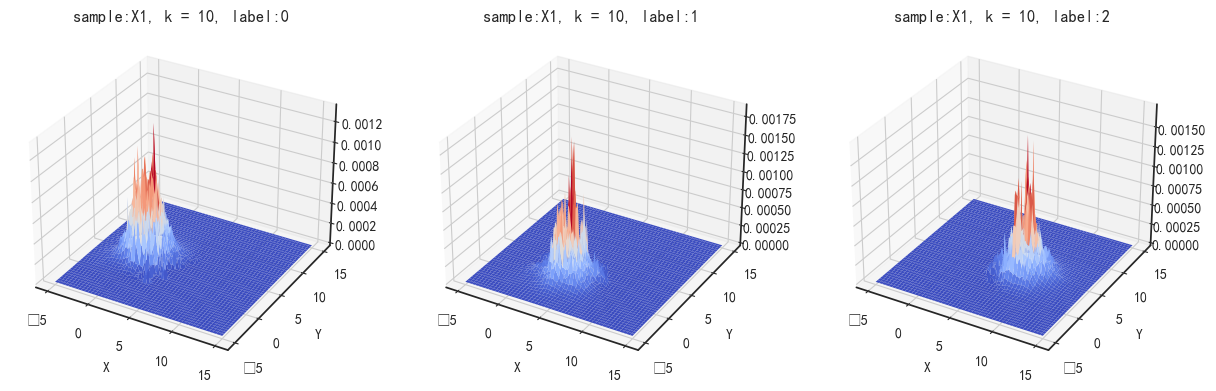

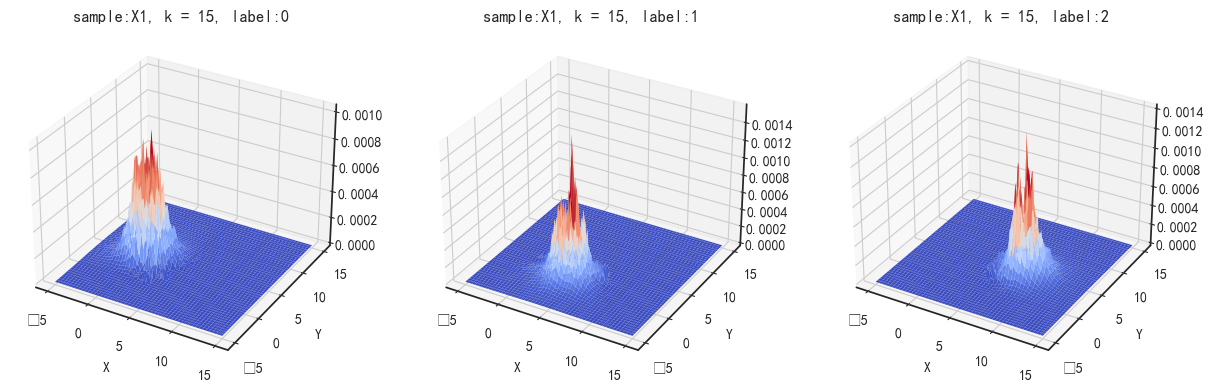

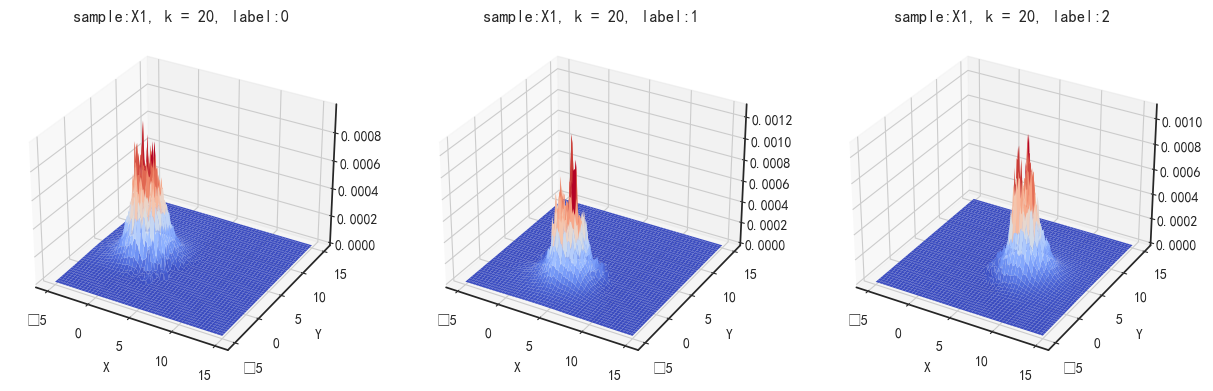

In [33]:
k = [10, 15, 20]

for i in k:
    p = Kneibor_Eval(X1, i)  # 获得概率密度估计

    # 高级要求1
    X, Y = np.mgrid[-5:15:200j, -5:15:200j]

    Z0 = p[:, :, 0]
    Z1 = p[:, :, 1]
    Z2 = p[:, :, 2]
    
    fig = plt.figure(figsize=(15,5))
    ax = plt.subplot(1, 3, 1, projection = '3d')
    ax.plot_surface(X, Y, Z0, cmap = plt.cm.coolwarm)
    ax.set_title("sample:X1, k = {}, label:0".format(i))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax = plt.subplot(1, 3, 2, projection = '3d')
    ax.plot_surface(X, Y, Z1, cmap = plt.cm.coolwarm)
    ax.set_title("sample:X1, k = {}, label:1".format(i))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax = plt.subplot(1, 3, 3, projection = '3d')
    ax.plot_surface(X, Y, Z2, cmap = plt.cm.coolwarm)
    ax.set_title("sample:X1, k = {}, label:2".format(i))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()